# **FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS**

**Part 1: Data Preparation and Exploration**

**Part 2: Model Building - ARIMA**

**Part 3: Model Building - Exponential Smoothing**

**Part 4: Evaluation and Comparison**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [2]:
import pandas as pd
from pandas import*

In [3]:
data=read_csv('exchange_rate.csv',header=0,index_col=0,parse_dates=True)
data.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 376.6+ KB


In [5]:
import seaborn as sns
from seaborn import*

<Axes: ylabel='Ex_rate'>

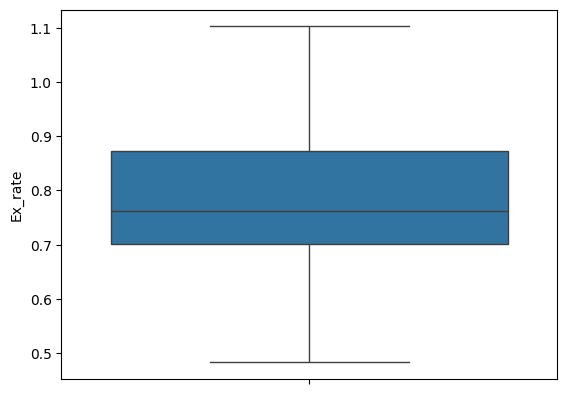

In [6]:
boxplot(data['Ex_rate'])

In [7]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Ex_rate', ylabel='Density'>

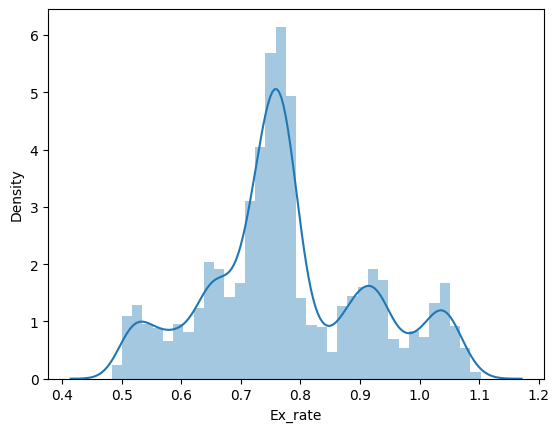

In [9]:
distplot(data['Ex_rate'])

<Axes: xlabel='Ex_rate', ylabel='Count'>

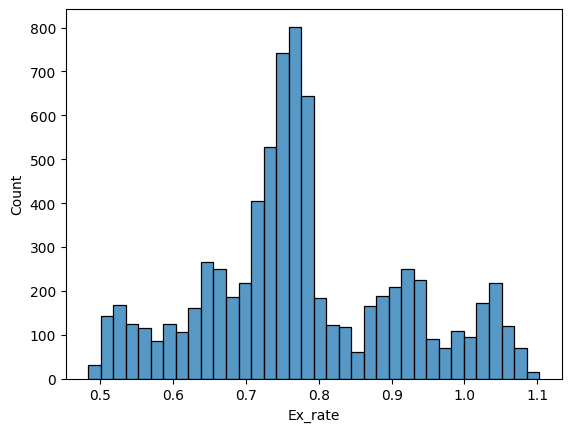

In [10]:
histplot(data['Ex_rate'])

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

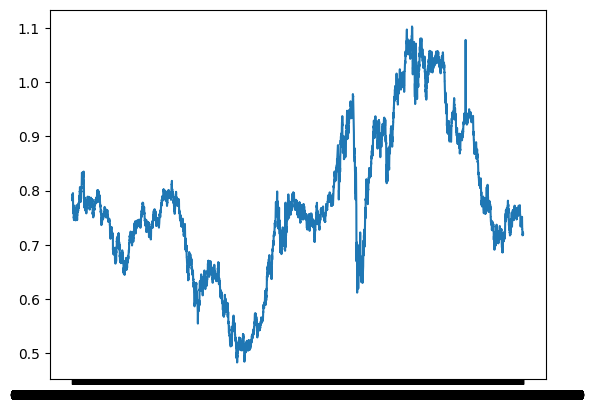

In [12]:
plot(data)

In [13]:
from matplotlib import pyplot

In [14]:
from pandas.plotting import lag_plot

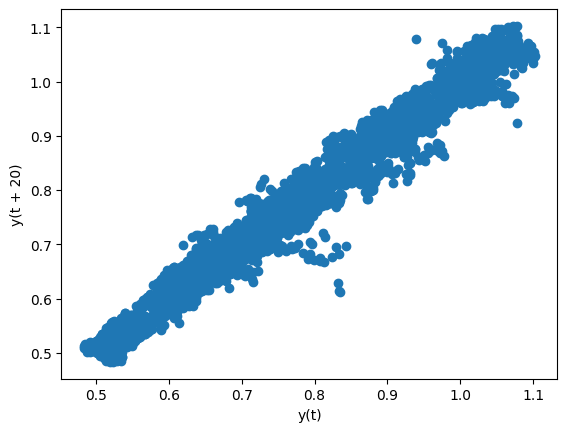

In [15]:
lag_plot(data,lag=20)
pyplot.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

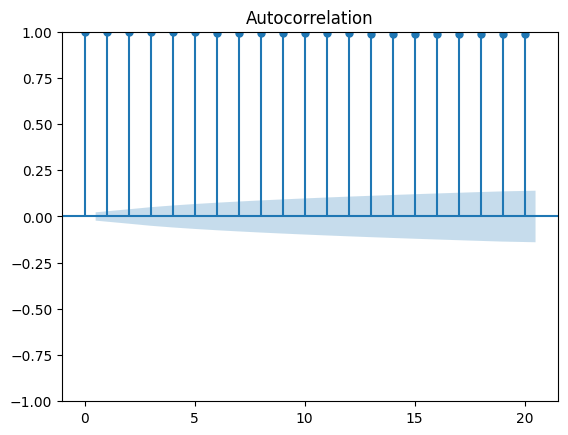

In [17]:
plot_acf(data,lags=20)
pyplot.show()

In [18]:
train=data.head(6000)
test=data.tail(1588)

<Axes: xlabel='date'>

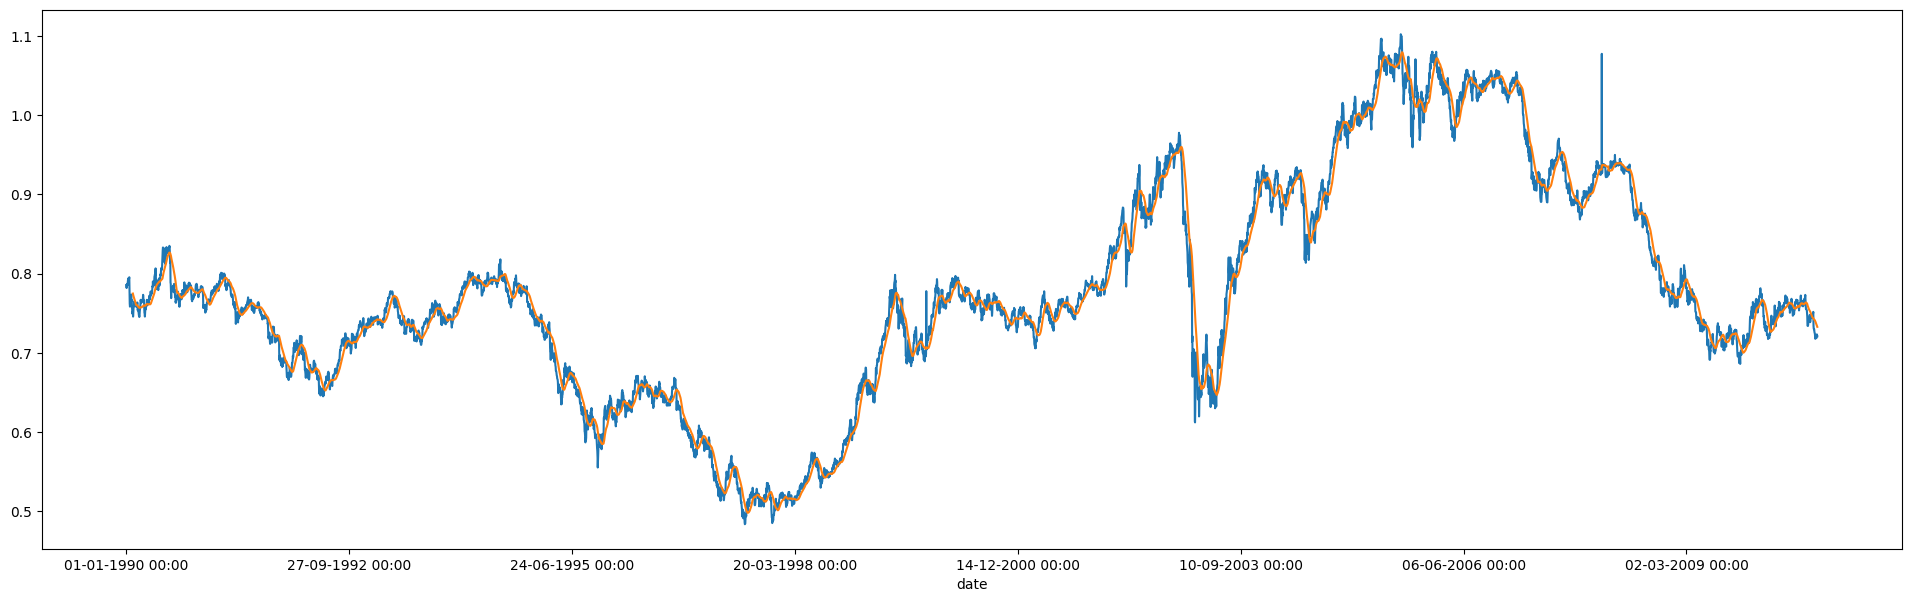

In [19]:
figure(figsize=(24,7))
data.Ex_rate.plot(label='data')
pred=DataFrame()
pred['moving_avg']=data['Ex_rate'].rolling(30).mean()
pred['moving_avg'].plot(label=str(10))

In [20]:
import numpy as np
from numpy import*

In [21]:
def MAPE(pred,org):
  data=abs((pred-org)/org)*100
  return mean(data)

In [22]:
test

,Ex_rate
date,
06-06-2006 00:00,1.037990
07-06-2006 00:00,1.037947
08-06-2006 00:00,1.026694
09-06-2006 00:00,1.022735
10-06-2006 00:00,1.031800
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [24]:
model=SimpleExpSmoothing(data)

In [25]:
fit=model.fit(smoothing_level=0.2,optimized=False)

In [26]:
data['smoothed']=fit.fittedvalues

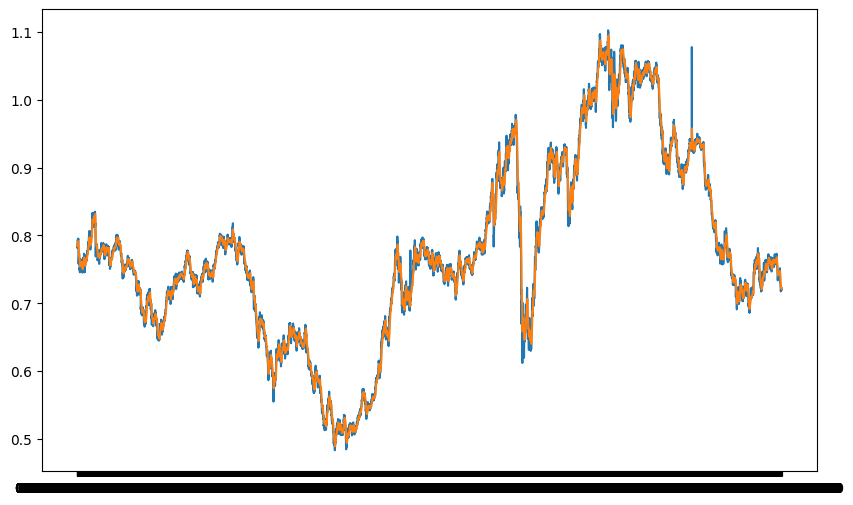

In [27]:
figure(figsize=(10,6))
plot(data['Ex_rate'])
plot(data['smoothed'])